In [ ]:
! pip install -q kaggle

In [ ]:
from google.colab import files

In [ ]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ahdibiaimene","key":"39df1b0e4ff4e831be65284367e4eab5"}'}

In [ ]:
! mkdir ~/.kaggle 

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list

ref                                                         title                                              size  lastUpdated          downloadCount  
----------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
gpreda/reddit-vaccine-myths                                 Reddit Vaccine Myths                              229KB  2021-06-14 06:30:31           7550  
crowww/a-large-scale-fish-dataset                           A Large Scale Fish Dataset                          3GB  2021-04-28 17:03:01           4591  
imsparsh/musicnet-dataset                                   MusicNet Dataset                                   22GB  2021-02-18 14:12:19           1546  
dhruvildave/wikibooks-dataset                               Wikibooks Dataset                                   1GB  2021-06-09 15:58:24           2223  
fatiimaezzahra/famous-iconic-women                          Famous Iconic Wo

In [ ]:
!kaggle datasets download -d mlg-ulb/creditcardfraud

 67% 44.0M/66.0M [00:00<00:00, 32.0MB/s]
100% 66.0M/66.0M [00:00<00:00, 71.6MB/s]


In [ ]:
!unzip creditcardfraud.zip

Archive:  creditcardfraud.zip
  inflating: creditcard.csv          


In [ ]:
from matplotlib.colors import Normalize
import pandas as pd
from pandas.core.frame import DataFrame 
import numpy as np 
from matplotlib import pyplot as plt 
from sklearn.utils import shuffle
import seaborn as sns
from collections import Counter
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler,MinMaxScaler,normalize
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score,classification_report,precision_score,recall_score,matthews_corrcoef,make_scorer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE, ADASYN,RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler,TomekLinks
from matplotlib import gridspec
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [ ]:
def PCA_ALGO(X,y):
    #PREPARATION DES DONNEES
    tsne = TSNE(n_components=2,learning_rate=100,perplexity=50.0,early_exaggeration=20.0,init='pca')
    NEW_X=pd.DataFrame(data=X,columns=colonnes_X)
    NEW_X['Class']=pd.DataFrame(data=y,columns=colonnes_Y)
    X=shuffle(NEW_X)
    y=X.iloc[:,-1].values

    pca = PCA(n_components=2)
    pca_data=pca.fit_transform(X)
    print(pca_data.shape)
    pca_data=np.vstack((pca_data.T,y)).T
    print(pca_data.shape)
    print(pca_data)
    pca_df=pd.DataFrame(data=pca_data,columns=('PCA1','PCA2','Classe'))
    sns.FacetGrid(pca_df,hue='Classe',size=6).map(plt.scatter,'PCA1','PCA2').add_legend()
    plt.show()

def Distribution(X,y):
    #PREPARATION DES DONNEES
    tsne = TSNE(n_components=2,learning_rate=100,perplexity=50.0,early_exaggeration=20.0,init='pca')
    NEW_X=pd.DataFrame(data=X,columns=colonnes_X)
    NEW_X['Class']=pd.DataFrame(data=y,columns=colonnes_Y)
    #SNS COUNTPLOT
    fig,ax=plt.subplots(figsize=(5,5))
    sns.countplot(data=NEW_X,x="Class")
    plt.show()

def reg_log(X_tr,y_tr,X_ts,y_ts):
    logreg = LogisticRegression()
    logreg.fit(X_tr,y_tr)
    y_pred = logreg.predict(X_ts)
    print('Accuracy :{0:0.5f}'.format(accuracy_score(y_pred, y_ts))) 
    print('Precision : {0:0.5f}'.format(precision_score(y_ts , y_pred)))
    print('Recall : {0:0.5f}'.format(recall_score(y_ts , y_pred)))
    print('F1 : {0:0.5f}'.format(f1_score(y_ts , y_pred)))
    print(f"\\\\Matrice de confusion ///:- \n {confusion_matrix(y_ts, y_pred)}")
    sns.heatmap(pd.DataFrame(confusion_matrix(y_ts, y_pred)), annot=True, annot_kws={"size": 25}, cmap="winter" ,fmt='g')
    plt.title('Matrice de confusion', y=1.1, fontsize = 22)
    plt.xlabel('Prédit',fontsize = 18)
    plt.ylabel('Réel',fontsize = 18)
    plt.show()



In [ ]:
def decision_tree_classification(X_tr,y_tr,X_ts,y_ts):
    dt_classifier = DecisionTreeClassifier()
    dt_classifier.fit(X_tr, y_tr.values.ravel())
    acc_score = dt_classifier.score(X_ts, y_ts)
    print(f'SCORE DU MODELE :- {acc_score}')
    y_pred = dt_classifier.predict(X_ts)
    print('Accuracy :{0:0.5f}'.format(accuracy_score(y_pred, y_ts))) 
    print('Precision : {0:0.5f}'.format(precision_score(y_ts , y_pred)))
    print('Recall : {0:0.5f}'.format(recall_score(y_ts , y_pred)))
    print('F1 : {0:0.5f}'.format(f1_score(y_ts , y_pred)))
    print(f"\\\\Matrice de confusion ///:- \n {confusion_matrix(y_ts, y_pred)}")
    sns.heatmap(pd.DataFrame(confusion_matrix(y_ts, y_pred)), annot=True, annot_kws={"size": 25}, cmap="winter" ,fmt='g')
    plt.title('Matrice de confusion', y=1.1, fontsize = 22)
    plt.xlabel('Prédit',fontsize = 18)
    plt.ylabel('Réel',fontsize = 18)
    plt.show()

In [ ]:
def random_forest_classifier(X_tr,y_tr,X_ts,y_ts):
    rf_classifier = RandomForestClassifier(n_estimators=50)
    rf_classifier.fit(X_tr, y_tr)
    acc_score = rf_classifier.score(X_tr, y_tr)
    print(f'SCORE DU MODELE :- {acc_score}')
    y_pred = rf_classifier.predict(X_test)
    print('Accuracy :{0:0.5f}'.format(accuracy_score(y_pred, y_ts))) 
    print('Precision : {0:0.5f}'.format(precision_score(y_ts , y_pred)))
    print('Recall : {0:0.5f}'.format(recall_score(y_ts , y_pred)))
    print('F1 : {0:0.5f}'.format(f1_score(y_ts , y_pred)))
    print(f"\\\\Matrice de confusion ///:- \n {confusion_matrix(y_ts, y_pred)}")
    sns.heatmap(pd.DataFrame(confusion_matrix(y_ts, y_pred)), annot=True, annot_kws={"size": 25}, cmap="winter" ,fmt='g')
    plt.title('Matrice de confusion', y=1.1, fontsize = 22)
    plt.xlabel('Prédit',fontsize = 18)
    plt.ylabel('Réel',fontsize = 18)
    plt.show()

In [ ]:
df = pd.read_csv('creditcard.csv').astype(np.float32)
colonnes_X=['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']

colonnes_Y=['Class']
Sc=StandardScaler()
Amount=df["Amount"].values
df["Amount"]=Sc.fit_transform(Amount.reshape(-1,1))
Time=df["Time"].values
df["Time"]=Sc.fit_transform(Time.reshape(-1,1))

x = df.drop('Class', axis=1)
y = df['Class']

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [ ]:
adasyn = ADASYN(random_state=42)
print("*"*10,"RANDOM FOREST :APRES ADASYN","*"*10)
X_train_adasyn, y_train_adasyn = adasyn.fit_resample(X_train, Y_train)
print("transactions de la X_TRAIN dataset apres ADASYN={}".format(Counter(y_train_adasyn)))
print("transactions de la dataset X_TEST originale ={}".format(Counter(Y_test)))
#random_forest_classifier(X_train_adasyn,y_train_adasyn,X_test,Y_test)
#Distribution(X_train_adasyn,y_train_adasyn)
# TSNE_algo(X_train_adasyn,y_train_adasyn)
# PCA_ALGO(X_train_adasyn,y_train_adasyn)

********** RANDOM FOREST :APRES ADASYN **********


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


transactions de la X_TRAIN dataset apres ADASYN=Counter({1.0: 227476, 0.0: 227454})
transactions de la dataset X_TEST originale =Counter({0.0: 56861, 1.0: 101})


In [ ]:
def reg_log_opti(X_tr,y_tr,X_ts,y_ts):
    logreg = LogisticRegression()
    # Hyperparameters
    grid = {'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000],'penalty':['l1','l2']}
    # KFold
    cv = KFold(n_splits=5,random_state=None,shuffle=False)
    #Scorer
    mcc_score=make_scorer(matthews_corrcoef)
    #GRID SEARCH
    log_clf=GridSearchCV(logreg, grid, cv=cv, n_jobs=-1, scoring=mcc_score)
    log_clf.fit(X_tr,y_tr)
    print("les meilleurs hyperparamètres pour la regression logistique sont :{}".format(log_clf.best_params_))
    y_pred = log_clf.predict(X_ts)
    print('Accuracy :{0:0.5f}'.format(accuracy_score(y_pred, y_ts))) 
    print('Precision : {0:0.5f}'.format(precision_score(y_ts , y_pred)))
    print('Recall : {0:0.5f}'.format(recall_score(y_ts , y_pred)))
    print('F1 : {0:0.5f}'.format(f1_score(y_ts , y_pred)))
    print('matthews_corrcoef : {0:0.5f}'.format(matthews_corrcoef(y_ts , y_pred)))
    print(f"\\\\Matrice de confusion ///:- \n {confusion_matrix(y_ts, y_pred)}")
    sns.heatmap(pd.DataFrame(confusion_matrix(y_ts, y_pred)), annot=True, annot_kws={"size": 25}, cmap="winter" ,fmt='g')
    plt.title('Matrice de confusion', y=1.1, fontsize = 22)
    plt.xlabel('Prédit',fontsize = 18)
    plt.ylabel('Réel',fontsize = 18)
    plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


FIN SMT ----------
transactions de la X_TRAIN dataset apres SMOTETOmek=Counter({0.0: 227454, 1.0: 227454})
transactions de la dataset X_TEST originale =Counter({0.0: 56861, 1.0: 101})
------------------------------ REGRESSION LOGISTIQUE PAR DEFAULT ------------------------------
Accuracy :0.97490
Precision : 0.06254
Recall : 0.94059
F1 : 0.11728
\\Matrice de confusion ///:- 
 [[55437  1424]
 [    6    95]]


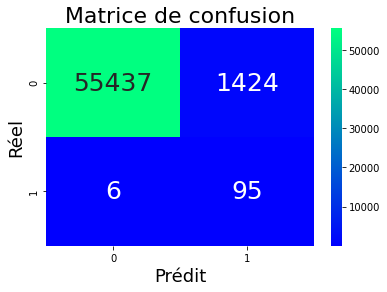

------------------------------ REGRESSION LOGISTIQUE PAR OPTIMISATION DES HYPERPARAMETRES ------------------------------
les meilleurs hyperparamètres pour la regression logistique sont :{'C': 0.001, 'penalty': 'l2'}
Accuracy :0.97677
Precision : 0.06728
Recall : 0.94059
F1 : 0.12558
matthews_corrcoef : 0.24825
\\Matrice de confusion ///:- 
 [[55544  1317]
 [    6    95]]


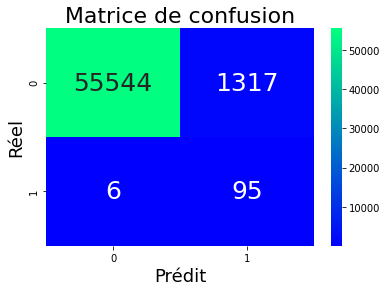

In [ ]:
from imblearn.combine import SMOTETomek
smt = SMOTETomek()
X_train_smt, y_train_smt = smt.fit_resample(X_train, Y_train)
print("FIN SMT ----------")
print("transactions de la X_TRAIN dataset apres SMOTETOmek={}".format(Counter(y_train_smt)))
print("transactions de la dataset X_TEST originale ={}".format(Counter(Y_test)))
#random_forest_classifier(X_train_smt,y_train_smt,X_test,Y_test)
print("-"*30,"REGRESSION LOGISTIQUE PAR DEFAULT",30*"-")
reg_log(X_train_smt,y_train_smt,X_test,Y_test)
print("-"*30,"REGRESSION LOGISTIQUE PAR OPTIMISATION DES HYPERPARAMETRES",30*"-")
reg_log_opti(X_train_smt,y_train_smt,X_test,Y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


FIN tl ----------
transactions de la X_TRAIN dataset apres SMOTETOmek=Counter({0.0: 227435, 1.0: 391})
transactions de la dataset X_TEST originale =Counter({0.0: 56861, 1.0: 101})
------------------------------ REGRESSION LOGISTIQUE PAR DEFAULT ------------------------------
Accuracy :0.99923
Precision : 0.88000
Recall : 0.65347
F1 : 0.75000
\\Matrice de confusion ///:- 
 [[56852     9]
 [   35    66]]


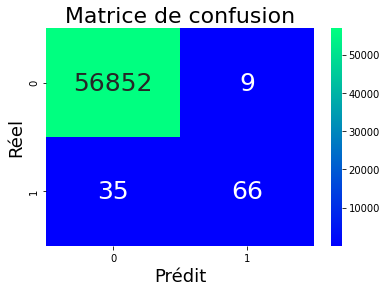

In [ ]:
tl=TomekLinks()
X_train_tl, y_train_tl = tl.fit_resample(X_train, Y_train)
print("FIN tl ----------")
print("transactions de la X_TRAIN dataset apres SMOTETOmek={}".format(Counter(y_train_tl)))
print("transactions de la dataset X_TEST originale ={}".format(Counter(Y_test)))
#random_forest_classifier(X_train_smt,y_train_smt,X_test,Y_test)
print("-"*30,"REGRESSION LOGISTIQUE PAR DEFAULT",30*"-")
reg_log(X_train_tl,y_train_tl,X_test,Y_test)